In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scanpy as sc
import matplotlib as mpl

In [3]:
paul_Y_phate = pd.read_csv('../1_Paul/paul.Y_phate.csv',index_col=0)
paul_Y_umap = pd.read_csv('../1_Paul/paul.Y_umap.csv',index_col=0)
paul_Y_tsne = pd.read_csv('../1_Paul/paul.Y_tsne.csv',index_col=0)
paul_Y_dtne = pd.read_csv('../1_Paul/paul.Y_dtne.csv',index_col=0)
paul_Y_pca = pd.read_csv('../1_Paul/paul.Y_pca.csv',index_col=0)

In [4]:
paul_cluster_color = pd.read_csv('../1_Paul/paul.cluster_color.csv',index_col=0).values.reshape(-1)
paul_cluster_categories = pd.read_csv('../1_Paul/paul.cluster_categories.csv',index_col=0).values.reshape(-1)

In [5]:
panc_Y_pca = pd.read_csv('../1_pancreas/panc.Y_pca.csv',index_col=0)
panc_Y_phate = pd.read_csv('../1_pancreas/panc.Y_phate.csv',index_col=0)
panc_Y_umap = pd.read_csv('../1_pancreas/panc.Y_umap.csv',index_col=0)
panc_Y_tsne = pd.read_csv('../1_pancreas/panc.Y_tsne.csv',index_col=0)
panc_Y_dtne = pd.read_csv('../1_pancreas/panc.Y_dtne.csv',index_col=0)

In [6]:
panc_cluster = pd.read_csv('../1_pancreas/panc.clusters.csv',index_col=0).values.reshape(-1)
panc_cluster_set = set(panc_cluster)
panc_zip_types = zip(sorted(panc_cluster_set),range(len(panc_cluster_set)))
panc_dict_types = dict(panc_zip_types)
panc_cell_clusters  =  [panc_dict_types[i] for i in panc_cluster]

In [7]:
nest_Y_pca = pd.read_csv('../1_nestorowa/nest.Y_pca.csv',index_col=0)
nest_Y_phate = pd.read_csv('../1_nestorowa/nest.Y_phate.csv',index_col=0)
nest_Y_umap = pd.read_csv('../1_nestorowa/nest.Y_umap.csv',index_col=0)
nest_Y_tsne = pd.read_csv('../1_nestorowa/nest.Y_tsne.csv',index_col=0)
nest_Y_dtne = pd.read_csv('../1_nestorowa/nest.Y_dtne.csv',index_col=0)

In [8]:
nest_label = pd.read_csv('../1_nestorowa/nest.cell_label.csv',index_col=0).values.reshape(-1)

In [9]:
eb_Y_phate = pd.read_csv('../1_EB/eb.Y_phate.csv',index_col=0)
eb_Y_umap = pd.read_csv('../1_EB/eb.Y_umap.csv',index_col=0)
eb_Y_tsne = pd.read_csv('../1_EB/eb.Y_tsne.csv',index_col=0)
eb_Y_dtne = pd.read_csv('../1_EB/eb.Y_dtne.csv',index_col=0)
eb_Y_pca = pd.read_csv('../1_EB/eb.Y_pca.csv',index_col=0)

In [10]:
eb_cell_type = pd.read_csv('../1_EB/eb.cell_type.csv',index_col=0).values.reshape(-1)
eb_sample_labels = pd.read_csv('../1_EB/sample_labels.csv',index_col=0,header=None,sep=" ").values.reshape(1,-1)[0]

In [11]:
rc_Y_pca = pd.read_csv("../1_COPILOT/rc.integrated.Y_pca.csv",index_col=0)
rc_Y_umap = pd.read_csv("../1_COPILOT/rc.integrated.umap_y.csv",index_col=0)
rc_Y_tsne = pd.read_csv("../1_COPILOT/rc.integrated.tsne_y.csv",index_col=0)
rc_Y_phate = pd.read_csv("../1_COPILOT/rc.integrated.phate_y.csv",index_col=0)
rc_Y_dtne = pd.read_csv("../1_COPILOT/rc.integrated.dtne_y.csv",index_col=0)

In [12]:
rc_cell_type = pd.read_csv("../1_COPILOT/rc.integrated.cell_type.csv",index_col=0).values.reshape(-1)
rc_clusters_set = set(rc_cell_type)
rc_zip_types = zip(sorted(rc_clusters_set),range(len(rc_clusters_set)))
rc_dict_types = dict(rc_zip_types)
rc_cell_clusters  =  [rc_dict_types[i] for i in rc_cell_type]

In [13]:
lymphoid_Y_pca = pd.read_csv("../1_lymphoid/lymphoid.Y_pca.csv",index_col=0)
lymphoid_Y_umap = pd.read_csv("../1_lymphoid/lymphoid.Y_umap.csv",index_col=0)
lymphoid_Y_tsne = pd.read_csv("../1_lymphoid/lymphoid.Y_tsne.csv",index_col=0)
lymphoid_Y_phate = pd.read_csv("../1_lymphoid/lymphoid.Y_phate.csv",index_col=0)
lymphoid_Y_dtne = pd.read_csv("../1_lymphoid/lymphoid.dtne_y.csv",index_col=0)

In [14]:
lymphoid_celltype = pd.read_csv("../1_lymphoid/lymphoid_celltype.csv", sep=",",index_col=0)
lymphoid_celltype_values = lymphoid_celltype['x'].values
lymphoid_zip_types = dict(zip(set(lymphoid_celltype_values),np.arange(1,8,1)))
lymphoid_cell_clusters  =  [lymphoid_zip_types[i] for i in lymphoid_celltype_values]

In [15]:
paul_Y_dtne_umap = pd.read_csv('../1_Paul/paul.Y_dtne_umap.csv',index_col=0)
panc_Y_dtne_umap = pd.read_csv('../1_pancreas/panc.Y_dtne_umap.csv',index_col=0)
nest_Y_dtne_umap = pd.read_csv('../1_nestorowa/nest.Y_dtne_umap.csv',index_col=0)
eb_Y_dtne_umap = pd.read_csv('../1_EB/eb.Y_dtne_umap.csv',index_col=0)
rc_Y_dtne_umap = pd.read_csv("../1_COPILOT/rc.integrated.Y_dtne_umap.csv",index_col=0)
lymphoid_Y_dtne_umap = pd.read_csv("../1_lymphoid/lymphoid.Y_dtne_umap.csv",index_col=0)

In [16]:
dr_Y = [[paul_Y_pca,paul_Y_umap,paul_Y_tsne,paul_Y_phate,paul_Y_dtne,paul_Y_dtne_umap],
        [nest_Y_pca,nest_Y_umap,nest_Y_tsne,nest_Y_phate,nest_Y_dtne,nest_Y_dtne_umap],
        [panc_Y_pca,panc_Y_umap,panc_Y_tsne,panc_Y_phate,panc_Y_dtne,panc_Y_dtne_umap],  
        [lymphoid_Y_pca,lymphoid_Y_umap,lymphoid_Y_tsne,lymphoid_Y_phate,lymphoid_Y_dtne,lymphoid_Y_dtne_umap],
        [eb_Y_pca,eb_Y_umap,eb_Y_tsne,eb_Y_phate,eb_Y_dtne,eb_Y_dtne_umap],
        [rc_Y_pca,rc_Y_umap,rc_Y_tsne,rc_Y_phate,rc_Y_dtne,rc_Y_dtne_umap]]

In [17]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE','DTNE(umap)']
cluster_colors = [paul_cluster_color,nest_label,panc_cell_clusters,lymphoid_cell_clusters,eb_cell_type,rc_cell_clusters]
cluster_set = [paul_cluster_categories,set(nest_label),panc_cluster_set,set(lymphoid_celltype_values),set(eb_sample_labels),rc_clusters_set]
cmap = 'Spectral'

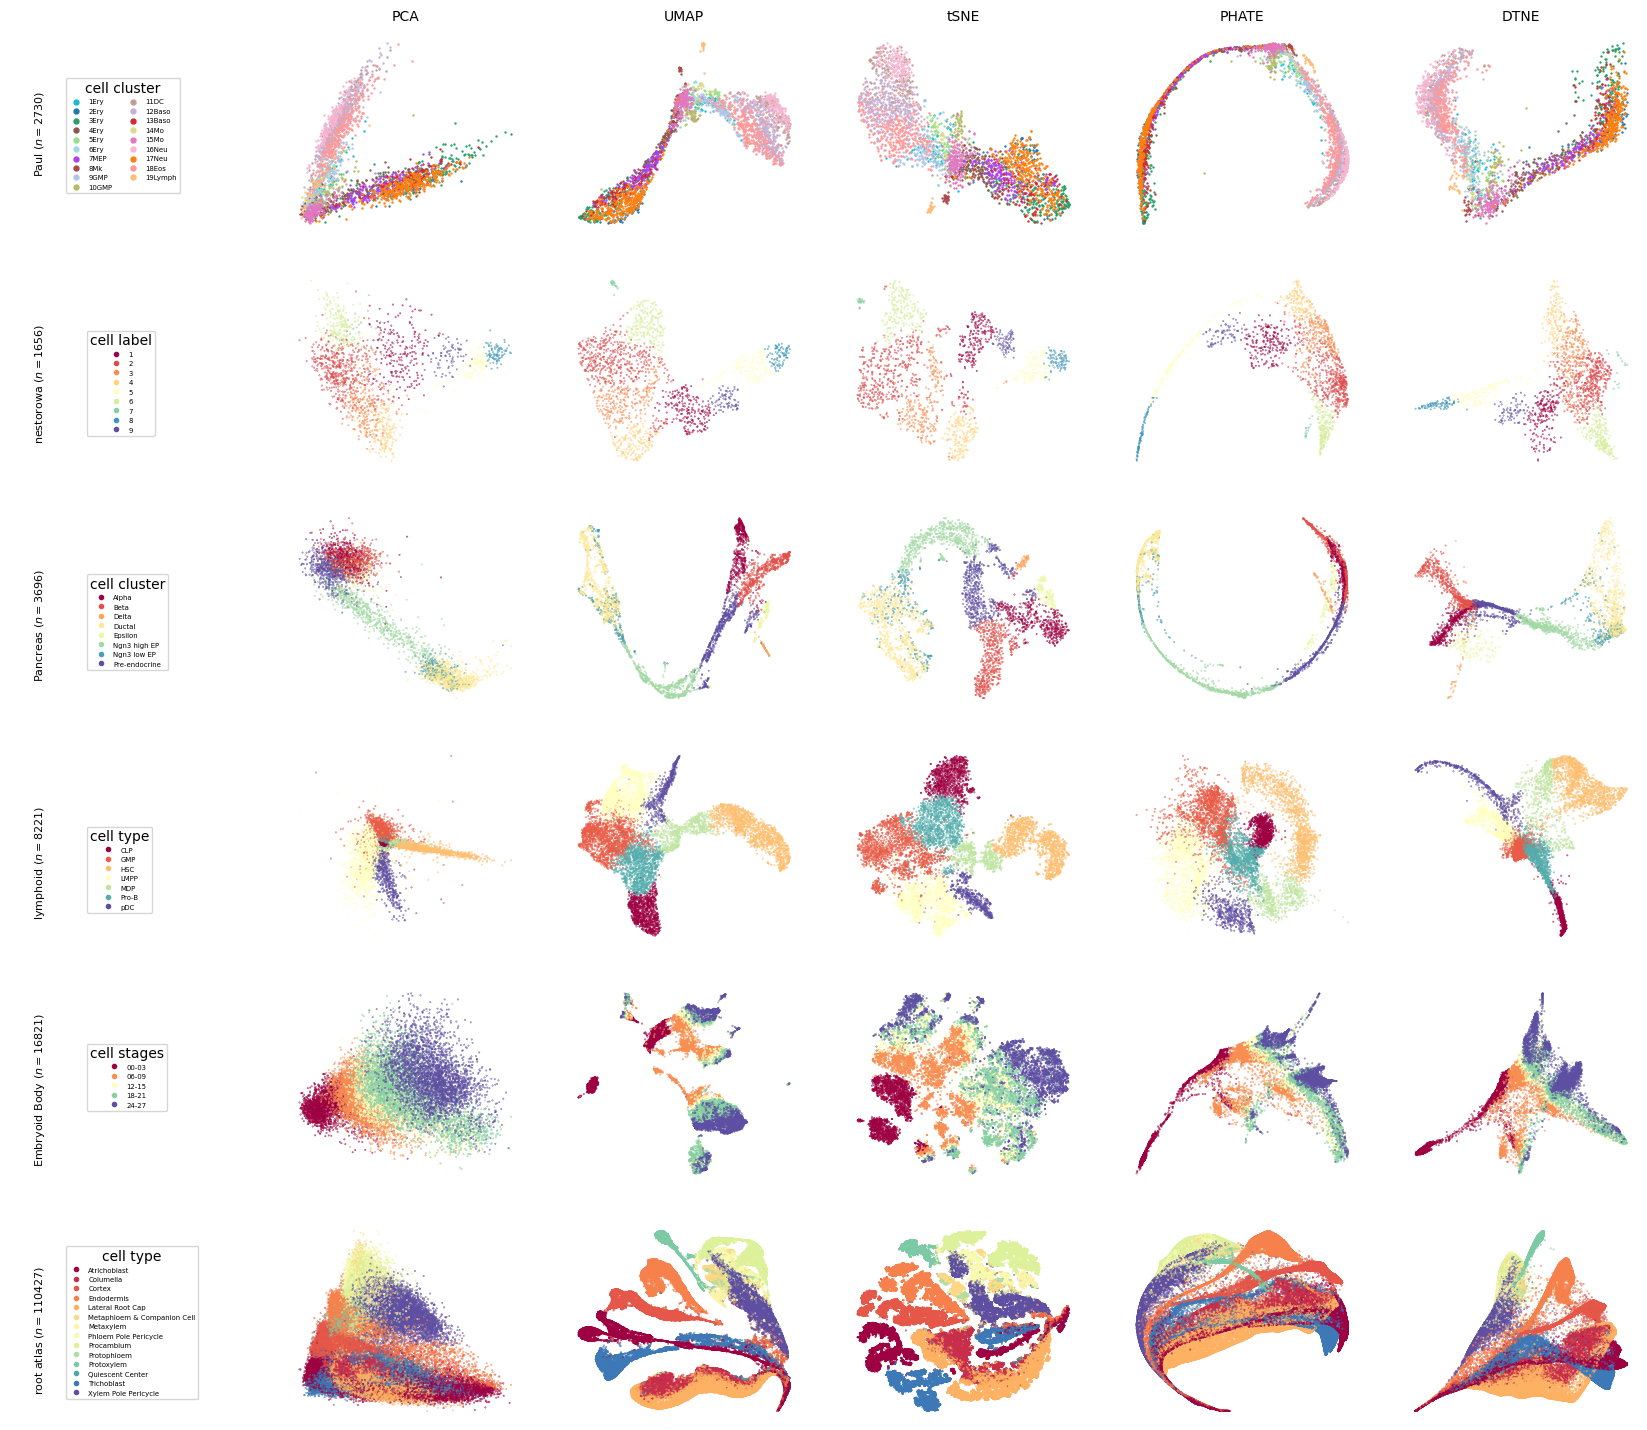

In [18]:
fig,axes = plt.subplots(nrows=6,ncols=6,figsize=(21, 18)) # fig= plt.figure(figsize=(12, 12))
for i in range(7):
    if i > 5:
        break
    for j in range(6):
        ax = axes[i,j]
        if j == 0:
            ax0 = ax
            ax0.axis("off")
        else:
            # print(i,j)
            Yd = dr_Y[i][j-1]
            if i == 0:
                ax.set_title(names[j-1],size=10,pad=10)
                Yd['cluster_color'] = cluster_colors[i]
                for color, group in Yd.groupby(['cluster_color']):
                    im = ax.scatter(x=group['0'], y=group['1'],c=color,s=0.5,label=color)
            else:
                im = ax.scatter(x=Yd['0'], y=Yd['1'],c=cluster_colors[i],s =0.1,cmap= cmap)
                handles, labels = im.legend_elements()
            im.set_rasterized(True)
            ax.axis("off")
    if i == 0:
        ax0.text(0.1, 0.3, 'Paul ($n=2730$)',rotation='vertical',fontsize=8)
        fig.legend(list(paul_cluster_categories), loc=3, ncol=2, bbox_to_anchor=(0.15, 0.79), frameon=True, title= "cell cluster",markerscale=5,fontsize = 5,title_fontsize=10)
    if i == 1:
        ax0.text(0.1, 0.15, 'nestorowa ($n=1656$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.655), frameon=True, title= "cell label",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 2:
        ax0.text(0.1, 0.15, 'Pancreas ($n=3696$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.525), frameon=True, title= "cell cluster",markerscale=0.5,fontsize = 5,title_fontsize=10)

    if i == 3:
        ax0.text(0.1, 0.15, 'lymphoid ($n=8221$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.39), frameon=True, title= "cell type",markerscale=0.5,fontsize = 5,title_fontsize=10)
    
    if i == 4:
        ax0.text(0.1, 0.1, 'Embryoid Body ($n=16821$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.28), frameon=True, title= "cell stages",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 5:
        ax0.text(0.1, 0.15, 'root atlas ($n=110427$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.15, 0.12), frameon=True, title= "cell type",markerscale=0.5,fontsize = 5,title_fontsize=10)
        
plt.savefig('./sc_dr4.png', format='png', dpi=1000)
plt.savefig('./sc_dr4.pdf', format='pdf', dpi=1000)

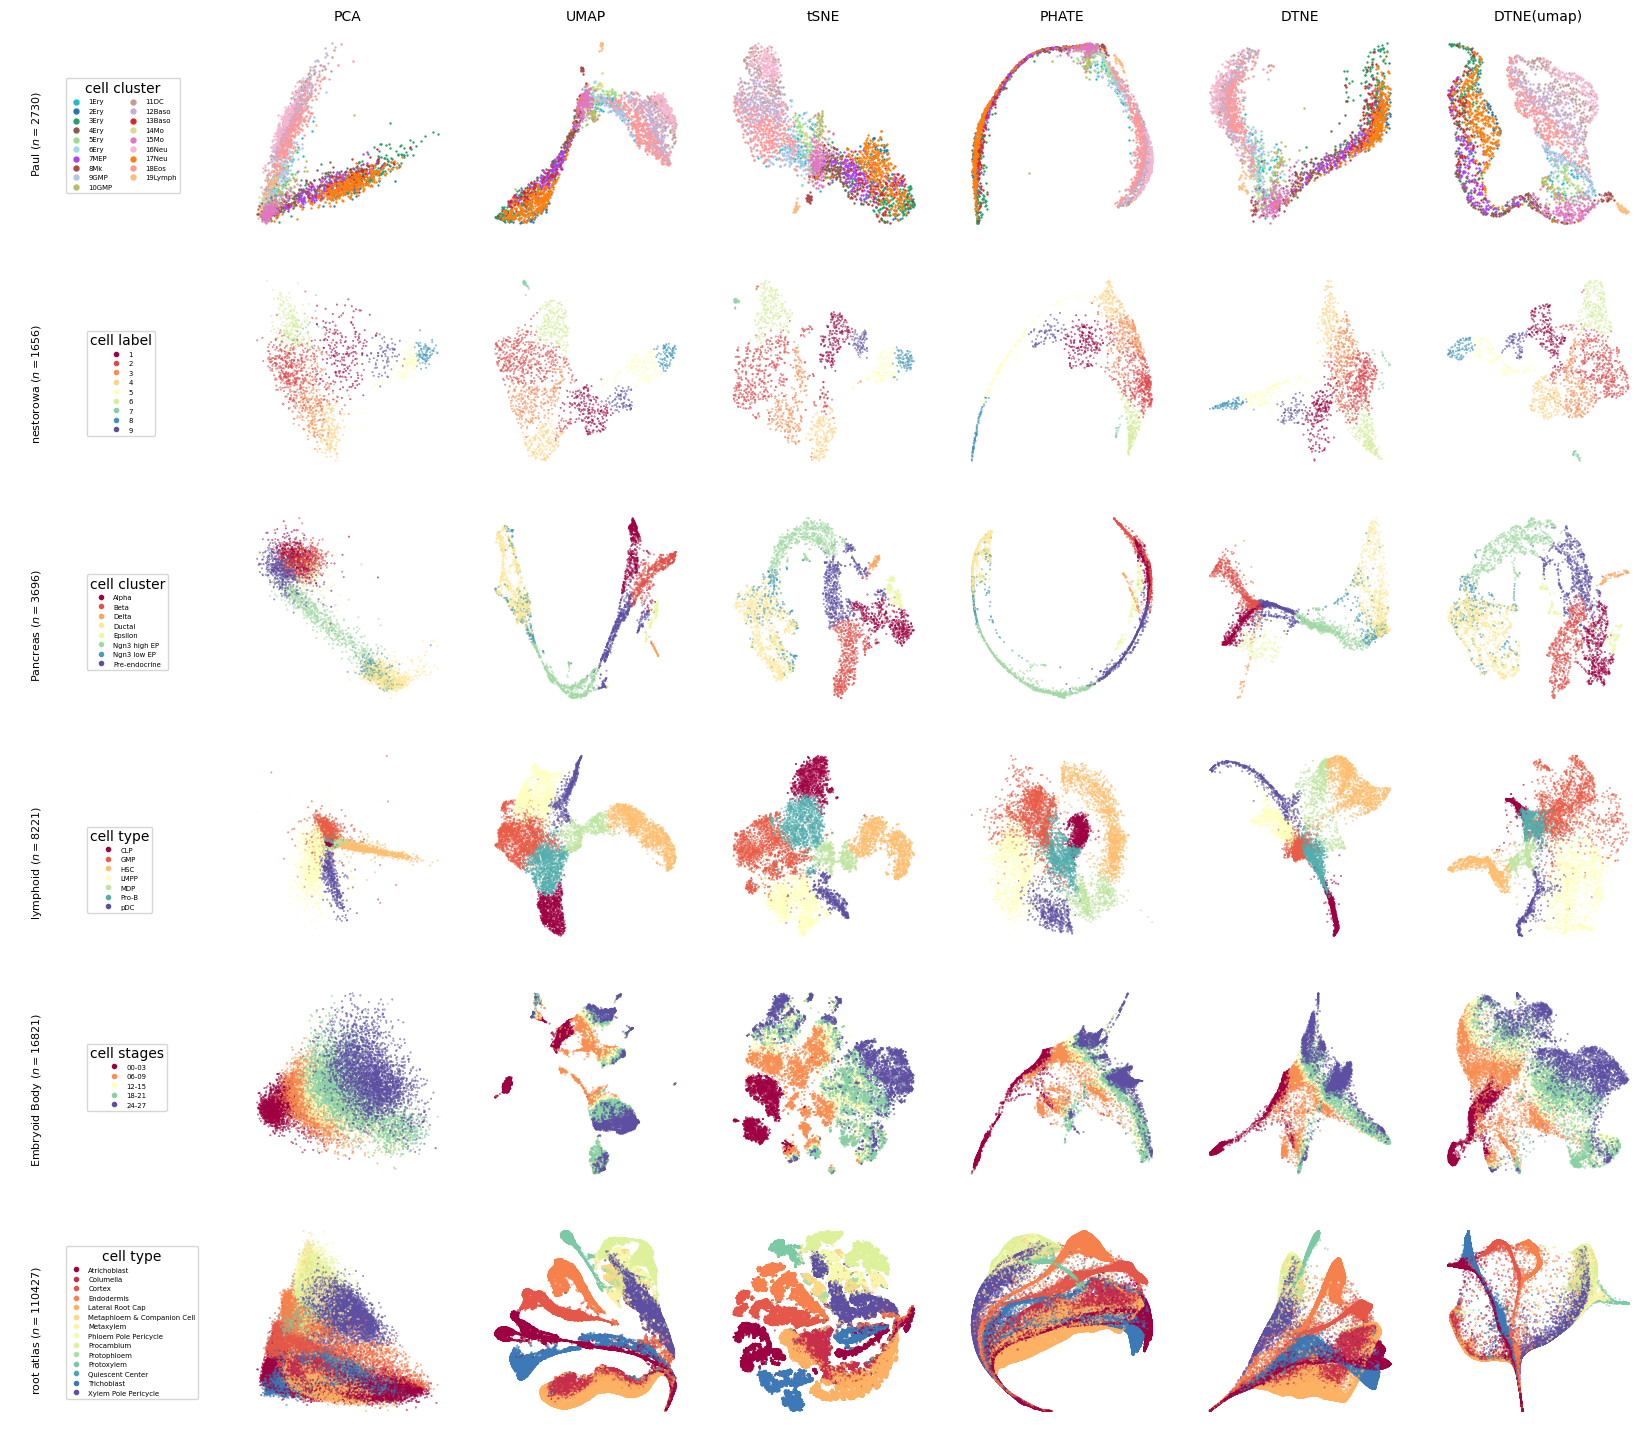

In [19]:
fig,axes = plt.subplots(nrows=6,ncols=7,figsize=(21, 18)) # fig= plt.figure(figsize=(12, 12))
for i in range(7):
    if i > 5:
        break
    for j in range(7):
        ax = axes[i,j]
        if j == 0:
            ax0 = ax
            ax0.axis("off")
        else:
            # print(i,j)
            Yd = dr_Y[i][j-1]
            if i == 0:
                ax.set_title(names[j-1],size=10,pad=10)
                Yd['cluster_color'] = cluster_colors[i]
                for color, group in Yd.groupby(['cluster_color']):
                    im = ax.scatter(x=group['0'], y=group['1'],c=color,s=0.5,label=color)
            else:
                im = ax.scatter(x=Yd['0'], y=Yd['1'],c=cluster_colors[i],s =0.1,cmap= cmap)
                handles, labels = im.legend_elements()
            im.set_rasterized(True)
            ax.axis("off")
    if i == 0:
        ax0.text(0.1, 0.3, 'Paul ($n=2730$)',rotation='vertical',fontsize=8)
        fig.legend(list(paul_cluster_categories), loc=3, ncol=2, bbox_to_anchor=(0.15, 0.79), frameon=True, title= "cell cluster",markerscale=5,fontsize = 5,title_fontsize=10)
    if i == 1:
        ax0.text(0.1, 0.15, 'nestorowa ($n=1656$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.655), frameon=True, title= "cell label",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 2:
        ax0.text(0.1, 0.15, 'Pancreas ($n=3696$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.525), frameon=True, title= "cell cluster",markerscale=0.5,fontsize = 5,title_fontsize=10)

    if i == 3:
        ax0.text(0.1, 0.15, 'lymphoid ($n=8221$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.39), frameon=True, title= "cell type",markerscale=0.5,fontsize = 5,title_fontsize=10)
    
    if i == 4:
        ax0.text(0.1, 0.1, 'Embryoid Body ($n=16821$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.28), frameon=True, title= "cell stages",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 5:
        ax0.text(0.1, 0.15, 'root atlas ($n=110427$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.15, 0.12), frameon=True, title= "cell type",markerscale=0.5,fontsize = 5,title_fontsize=10)
        
plt.savefig('./sc_dr3.png', format='png', dpi=1000)
# plt.savefig('./sc_dr3.pdf', format='pdf', dpi=1000)

In [20]:
dr_Y2 = [[paul_Y_dtne,nest_Y_dtne,panc_Y_dtne,lymphoid_Y_dtne,eb_Y_dtne,rc_Y_dtne],
         [paul_Y_dtne_umap,nest_Y_dtne_umap,panc_Y_dtne_umap,lymphoid_Y_dtne_umap,eb_Y_dtne_umap,rc_Y_dtne_umap ]]
names2 = ['DTNE','DTNE(umap)']
cluster_colors = [paul_cluster_color,nest_label,panc_cell_clusters,lymphoid_cell_clusters,eb_cell_type,rc_cell_clusters]
cluster_set = [paul_cluster_categories,set(nest_label),panc_cluster_set,set(lymphoid_celltype_values),set(eb_sample_labels),rc_clusters_set]
cmap = 'Spectral'

In [21]:
from matplotlib.lines import Line2D

C:\anaconda3\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


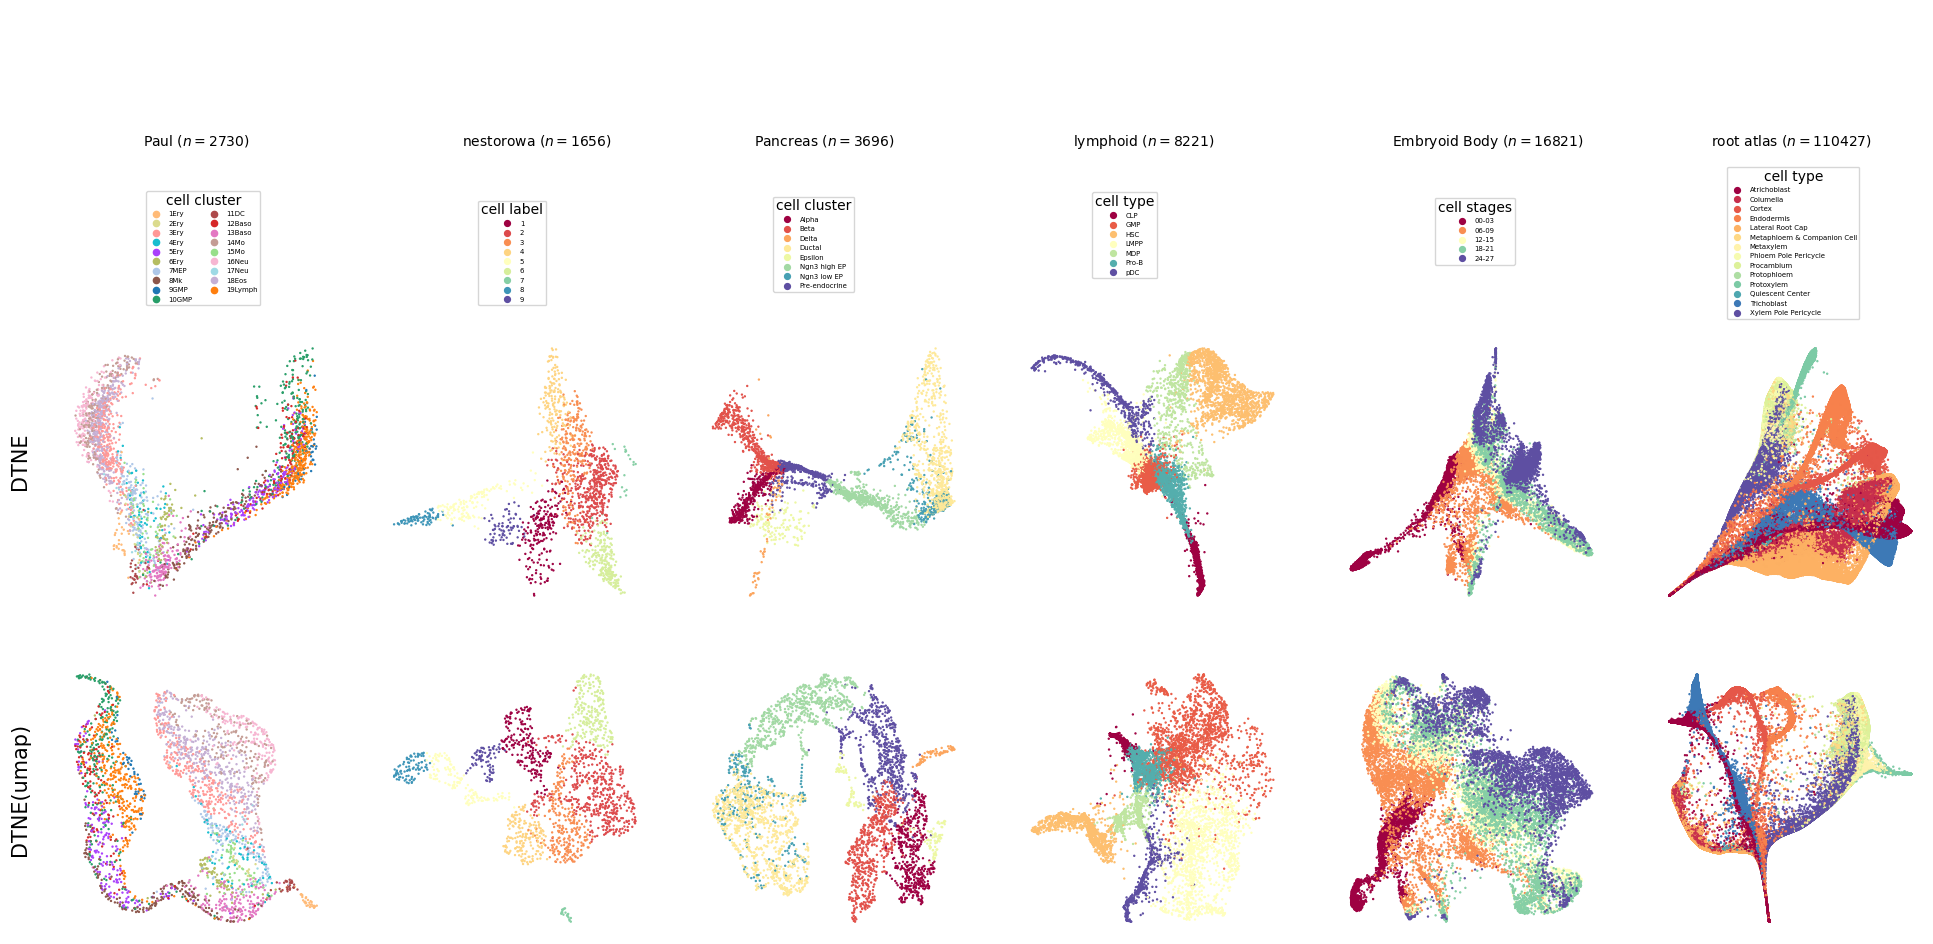

In [24]:
grids = plt.GridSpec(3, 6)
fig = plt.figure(figsize=(24, 12))
handles_list = []
for i in range(3):
    if i < 2:
        for j in range(6):
            ax = fig.add_subplot(grids[i+1, j])
            Yd = dr_Y2[i][j]
            if j == 0:
                im = ax.scatter(x=Yd['0'], y=Yd['1'], c=cluster_colors[j], s =0.5)
            else:
                im = ax.scatter(x=Yd['0'], y=Yd['1'], c=cluster_colors[j], s =0.5,cmap=cmap) 
            im.set_rasterized(True)
            handles, labels = im.legend_elements()
            handles_list.append(handles)
            ax.axis("off")
    if i == 2:
        for j in range(6):
            ax = fig.add_subplot(grids[i-2, j])
            if j == 0:
                ax.text(0.3, 0.5, 'Paul ($n=2730$)',fontsize=10)
                # from matplotlib.patches import Rectangle
                
                recs = []
                class_colours = list(set(paul_cluster_color))
                for ii in range(0, len(class_colours)):
                    # recs.append(Rectangle((0, 0), 1, 1, fc=class_colours[ii]))
                    recs.append(Line2D([], [], color="white", marker='o', markersize=1, mec=class_colours[ii], mfc=class_colours[ii])) 
                ax.legend(recs, list(paul_cluster_categories), loc=3, ncol=2, bbox_to_anchor=(0.3, -.1), frameon=True, title= "cell cluster",markerscale= 4.5,fontsize = 5,title_fontsize=10)

                ax.text(-0.2, -0.75, 'DTNE',rotation='vertical',fontsize=15)
                ax.text(-0.2, -2.1, 'DTNE(umap)',rotation='vertical',fontsize=15)
                
            if j == 1:
                ax.text(0.3, 0.5, 'nestorowa ($n=1656$)',fontsize=10)
                ax.legend(handles_list[j], sorted(cluster_set[j]), loc=3, ncol=1, bbox_to_anchor=(0.35, -0.1), frameon=True, title= "cell label",markerscale=0.7,fontsize = 5,title_fontsize=10)
            if j == 2:
                ax.text(0.2, 0.5, 'Pancreas ($n=3696$)',fontsize=10)
                ax.legend(handles_list[j], sorted(cluster_set[j]), loc=3, ncol=1, bbox_to_anchor=(0.26, -0.05), frameon=True, title= "cell cluster",markerscale=0.7,fontsize = 5,title_fontsize=10)
            if j == 3:
                ax.text(0.2, 0.5, 'lymphoid ($n=8221$)',fontsize=10)
                ax.legend(handles_list[j], sorted(cluster_set[j]), loc=3, ncol=1, bbox_to_anchor=(0.26, -0), frameon=True, title= "cell type",markerscale=0.7,fontsize = 5,title_fontsize=10)
            if j == 4:
                ax.text(0.2, 0.5, 'Embryoid Body ($n=16821$)',fontsize=10)
                ax.legend(handles_list[j], sorted(cluster_set[j]), loc=3, ncol=1, bbox_to_anchor=(0.35, 0.05), frameon=True, title= "cell stages",markerscale=0.7,fontsize = 5,title_fontsize=10)
            if j == 5:
                ax.text(0.2, 0.5, 'root atlas ($n=110427$)',fontsize=10)
                ax.legend(handles_list[j], sorted(cluster_set[j]), loc=3, ncol=1, bbox_to_anchor=(0.25, -0.15), frameon=True, title= "cell type",markerscale=0.7,fontsize = 5,title_fontsize=10)
            ax.axis("off")
plt.savefig('./sc_dr5.png', format='png', bbox_inches='tight', dpi=1000)
plt.savefig('./sc_dr5.pdf', format='pdf', bbox_inches='tight', dpi=1000)